# 2019 MLB Hitting dataset cleaning and analysis

#### Datasource:
- [2019 and 2020 Hitting Data](https://www.rotowire.com/baseball/stats.php)

#### Todo List:
- Imports
- Clean the data if need be
- Vizualize some of the data
- Start building models
- Tune Models
- Find the Top 2 best models for the data sets
- Create Easy to Read Dataframes comparing the test data and the predictions

In [405]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#Model Building Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

#Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [414]:
# Read in dataset
df = pd.read_csv('2019-batting-players.csv', index_col='Player')

In [415]:
# looking at the first 5 rows of data
df.head(5)

,Team,Pos,Age,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,SH,SF,HBP,AVG,OBP,SLG,OPS
Player,,,,,,,,,,,,,,,,,,,,,,
Whit Merrifield,KC,2B,31,162,681,105,206,41,10,16,74,20,10,45,126,0,4,5,0.302,0.348,0.463,0.811
Marcus Semien,OAK,SS,29,162,657,123,187,43,7,33,92,10,8,87,102,0,1,2,0.285,0.369,0.522,0.891
Rafael Devers,BOS,3B,23,156,647,129,201,54,4,32,115,8,8,48,119,1,2,4,0.311,0.361,0.555,0.916
Jonathan Villar,BAL,2B,29,162,642,111,176,33,5,24,73,40,9,61,176,2,4,4,0.274,0.339,0.453,0.792
Ozzie Albies,ATL,2B,23,160,640,102,189,43,8,24,86,15,4,54,112,0,4,4,0.295,0.352,0.500,0.852


In [427]:
df = df.drop('Team', axis=1)

In [428]:
# Describing the dataset
print(round(df.describe()))

         Age      G     AB      R      H  ...    HBP    AVG    OBP    SLG    OPS
count  694.0  694.0  694.0  694.0  694.0  ...  694.0  694.0  694.0  694.0  694.0
mean    29.0   72.0  234.0   33.0   60.0  ...    3.0    0.0    0.0    0.0    1.0
std      4.0   51.0  191.0   31.0   54.0  ...    4.0    0.0    0.0    0.0    0.0
min     21.0    1.0    1.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
25%     26.0   25.0   56.0    6.0   12.0  ...    0.0    0.0    0.0    0.0    1.0
50%     28.0   69.0  191.0   26.0   44.0  ...    2.0    0.0    0.0    0.0    1.0
75%     31.0  120.0  392.0   54.0  100.0  ...    4.0    0.0    0.0    0.0    1.0
max     46.0  162.0  681.0  135.0  206.0  ...   27.0    0.0    1.0    1.0    1.0

[8 rows x 20 columns]


In [429]:
# Getting count of missing values
missing_value_count = df.isnull().sum()

# Getting missing values for all columns
missing_value_count[:len(df.columns)]

Pos    0
Age    0
G      0
AB     0
R      0
H      0
2B     0
3B     0
HR     0
RBI    0
SB     0
CS     0
BB     0
SO     0
SH     0
SF     0
HBP    0
AVG    0
OBP    0
SLG    0
OPS    0
dtype: int64

### There are no missing values in this dataset

#### Column Labels
- Tm: Team Name
- BatAge: Average Player Age for Each Team
- R/G: Runs per Game
- G: Games played
- PA: Number of Plate Appearances
- AB: Number of At Bats
- R: Number of Runs scored
- H: Number of Hits
- 2B: Number of Doubles
- 3B: Number of Triples
- HR: Numbber of Homeruns
- RBI: Number of Runs Batted In

In [546]:
# Visualization Functions
def create_distplot(df, column):
  plt.figure(figsize=(10,5))
  plt.title(f"Displot: {column}")
  sns.distplot(df[column], hist=True, color="g", kde_kws={"shade": True})

def create_scatter(df, x, y):
  plt.figure(figsize=(10,5))
  plt.title(f"Scatter: {x} vs {y}")
  sns.scatterplot(df[x], df[y])

def create_heatmap(df):
  corr = df.corr()
  plt.figure(figsize=(16,8))
  # Generate a custom diverging colormap
  cmap = sns.diverging_palette(220, 10, as_cmap=True)

  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})
  
def create_lineplot(df, x, y, hue=None, style=None):
  plt.figure(figsize=(16,8))
  plt.title(f"Lineplot: {x} vs {y}")
  sns.lineplot(x=x, y=y,
               hue = hue,
               style=style,
               data=df)

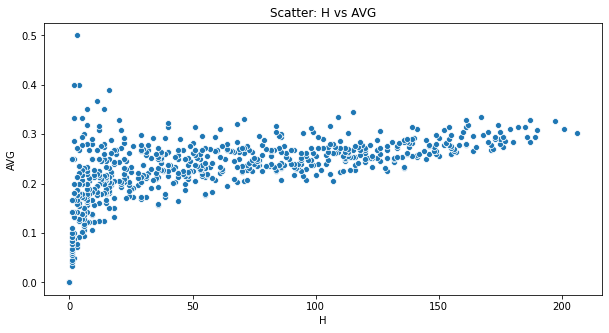

In [432]:
# Scatter for Hits vs Batting Average
create_scatter(df, 'H', 'AVG')

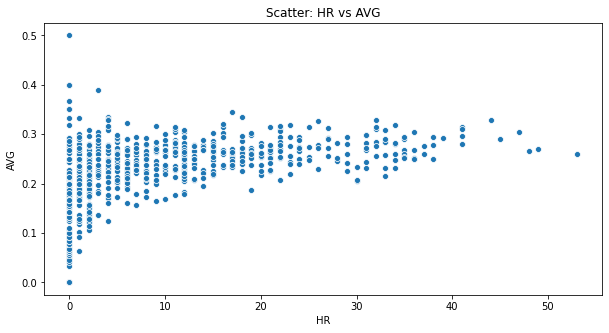

In [433]:
# Scatter for Homeruns vs Batting Average
create_scatter(df, 'HR', 'AVG')

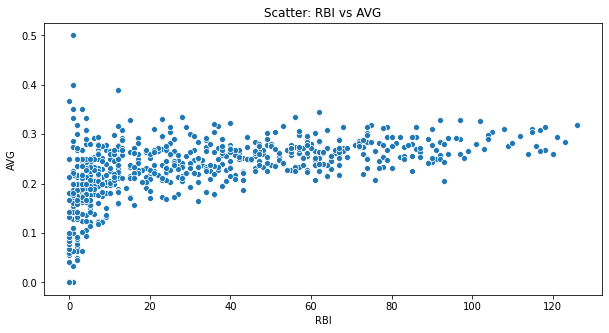

In [434]:
#Scatter for Runs Batted In vs Batting Average
create_scatter(df, 'RBI', 'AVG')

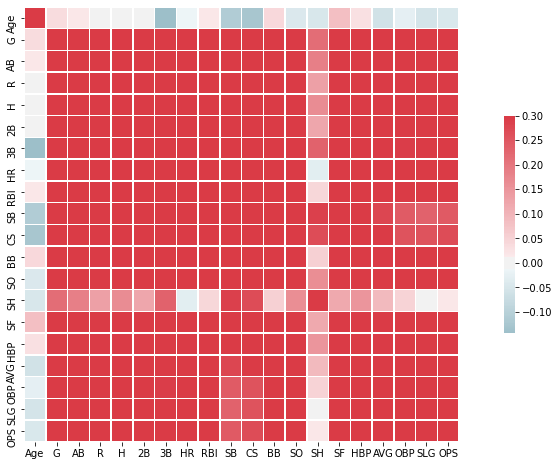

In [547]:
#Heatmap for data
create_heatmap(df)

In [445]:
# Getting all cont features in one list
cont_features = df[['Age',
 'G',
 'AB',
 'R',
 'H',
 '2B',
 '3B',
 'HR',
 'RBI',
 'SB',
 'CS',
 'BB',
 'SO',
 'SH',
 'SF',
 'HBP',
 'AVG',
 'OBP',
 'SLG',
 'OPS']]

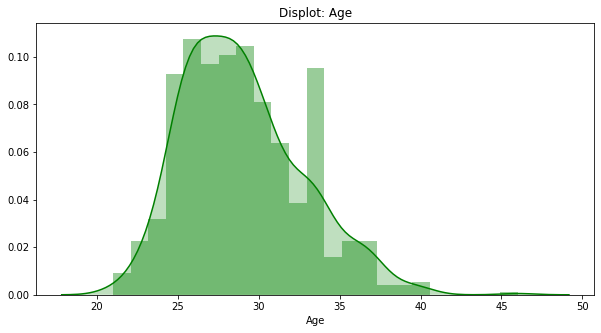

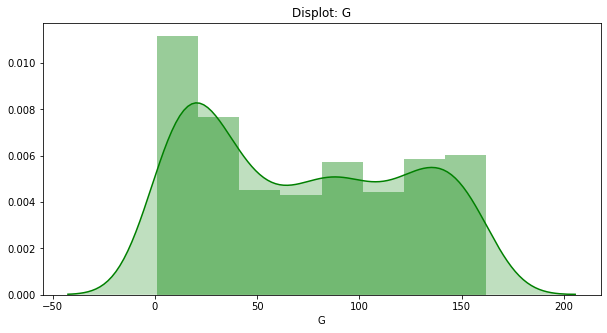

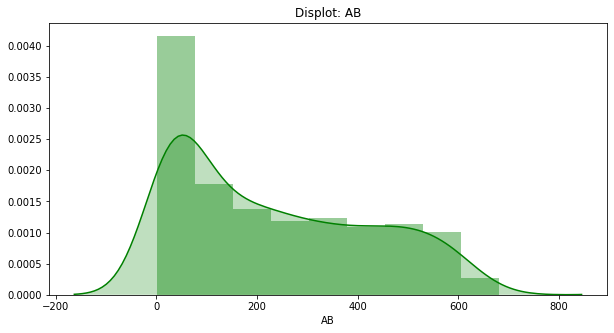

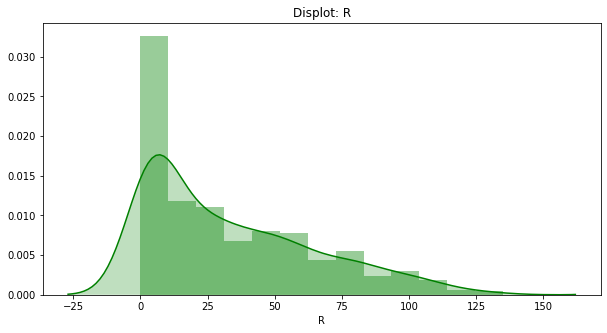

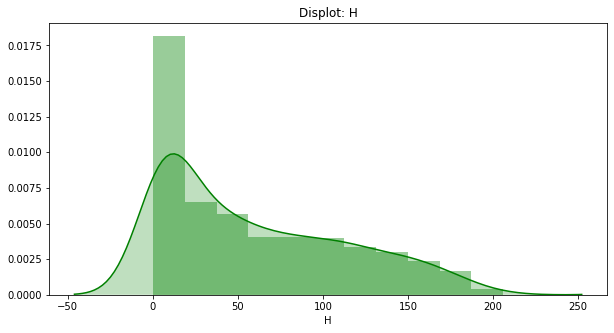

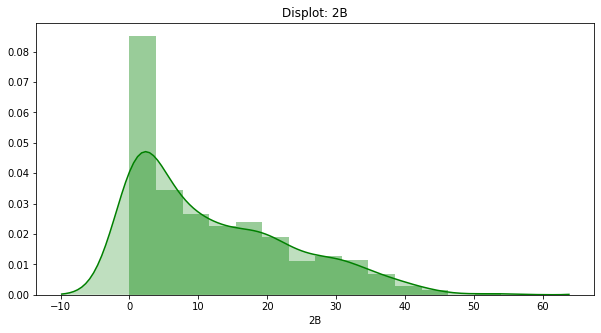

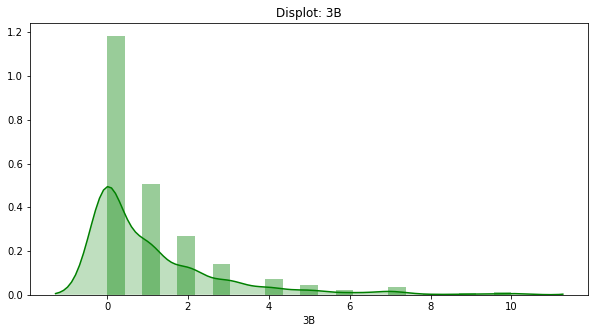

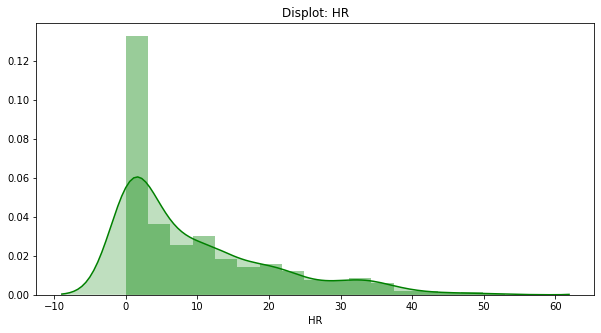

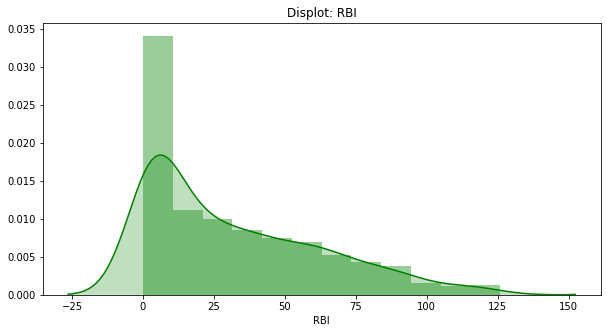

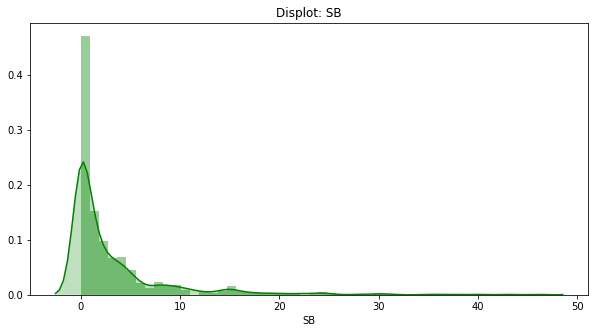

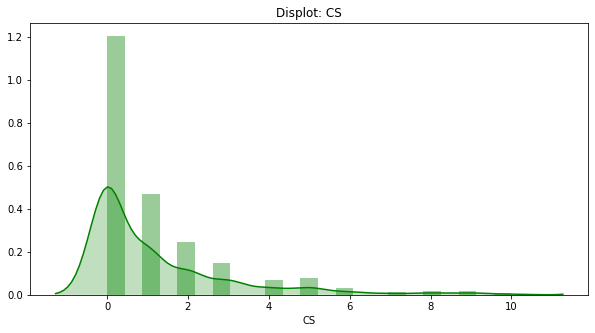

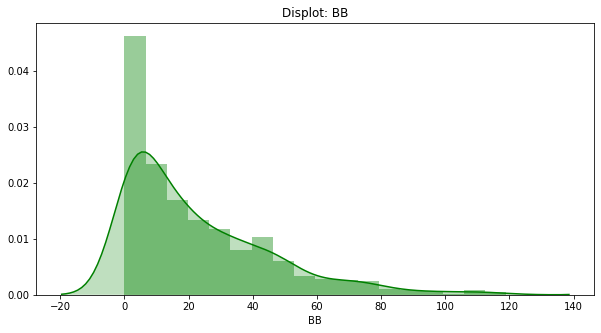

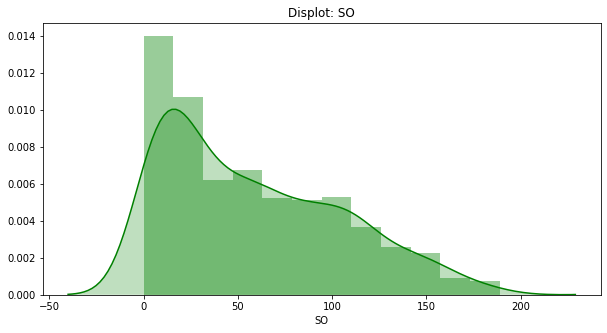

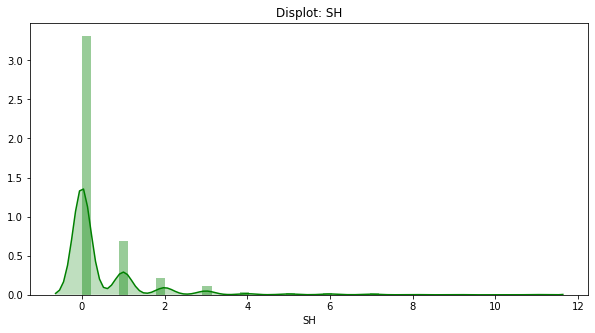

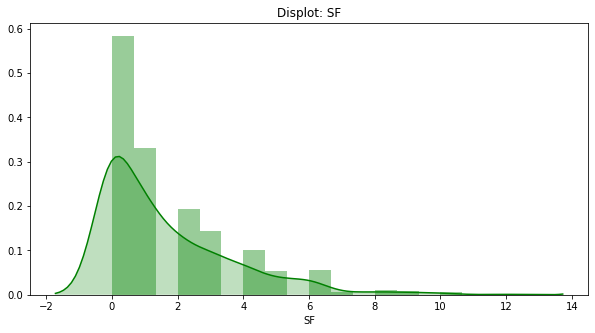

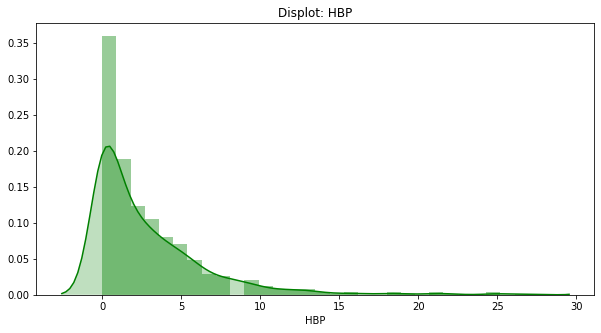

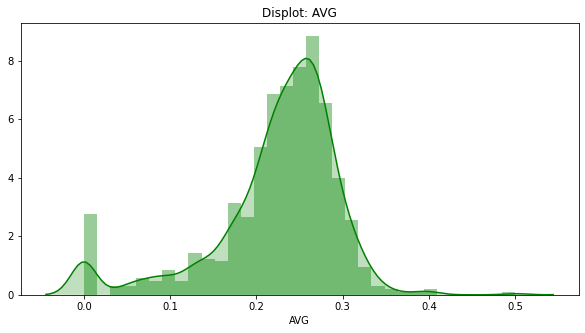

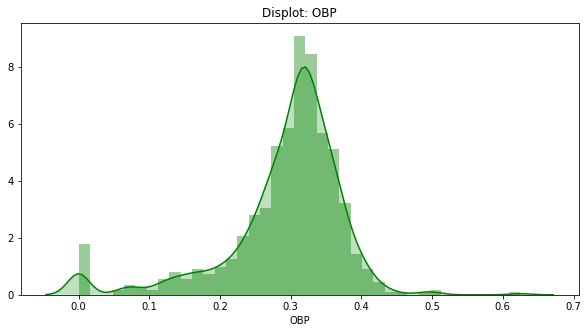

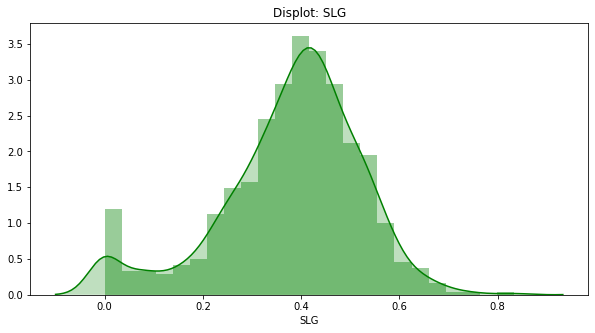

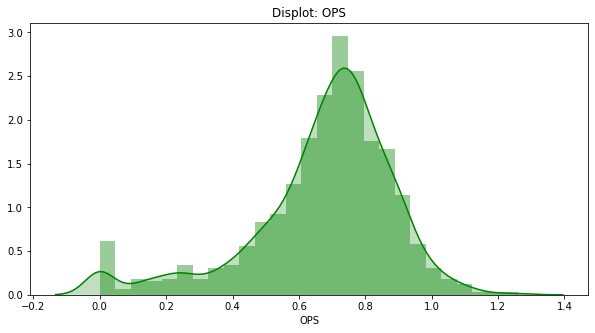

In [446]:
# making dist plots for all cont features
for feature in cont_features:
  create_distplot(df, feature)

In [448]:
df_corr = df.corr()
df_corr

,Age,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,SH,SF,HBP,AVG,OBP,SLG,OPS
Age,1.000000,0.038070,0.016136,-0.010009,0.006317,-0.000689,-0.143433,-0.012528,0.018767,-0.110743,-0.127840,0.040966,-0.041368,-0.046867,0.082395,0.029142,-0.059650,-0.025679,-0.054268,-0.045652
G,0.038070,1.000000,0.969954,0.915875,0.942287,0.896391,0.564664,0.806315,0.895450,0.488312,0.550636,0.837751,0.898666,0.215864,0.672713,0.607395,0.528612,0.503941,0.535616,0.546692
AB,0.016136,0.969954,1.000000,0.957838,0.986074,0.939468,0.602716,0.848267,0.937138,0.521678,0.579466,0.848547,0.904599,0.184299,0.705769,0.602817,0.521537,0.482275,0.534844,0.537869
R,-0.010009,0.915875,0.957838,1.000000,0.965904,0.933810,0.599291,0.903566,0.945905,0.540560,0.567191,0.884751,0.868967,0.133138,0.673317,0.616215,0.526657,0.511992,0.582472,0.580691
H,0.006317,0.942287,0.986074,0.965904,1.000000,0.952104,0.617674,0.847494,0.939549,0.528482,0.580298,0.825302,0.858383,0.164642,0.705616,0.586628,0.563677,0.507328,0.563493,0.566382
2B,-0.000689,0.896391,0.939468,0.933810,0.952104,1.000000,0.583682,0.806385,0.906077,0.489094,0.553691,0.797705,0.822149,0.122763,0.683754,0.565040,0.540306,0.488869,0.563757,0.559473
3B,-0.143433,0.564664,0.602716,0.599291,0.617674,0.583682,1.000000,0.415981,0.512286,0.607391,0.598862,0.450018,0.523927,0.231963,0.433295,0.345210,0.341491,0.293806,0.326447,0.328080
HR,-0.012528,0.806315,0.848267,0.903566,0.847494,0.806385,0.415981,1.000000,0.943098,0.343939,0.386752,0.840008,0.840046,-0.031770,0.603809,0.569077,0.447735,0.453961,0.617281,0.581389
RBI,0.018767,0.895450,0.937138,0.945905,0.939549,0.906077,0.512286,0.943098,1.000000,0.410716,0.462227,0.853445,0.863211,0.043620,0.719915,0.584599,0.511626,0.488010,0.602898,0.584964
SB,-0.110743,0.488312,0.521678,0.540560,0.528482,0.489094,0.607391,0.343939,0.410716,1.000000,0.736842,0.401326,0.475337,0.288812,0.322329,0.330922,0.279363,0.244480,0.233177,0.247626


In [449]:
# Getting Features that have a correlation of greater than 0.5 for model building
selected_features = []
for i in range(len(df_corr['AVG'])):
  if df_corr['AVG'].values[i] >= 0.5 and df_corr['AVG'].values[i] != 1.0:
    selected_features.append(df_corr['AVG'].index[i])

In [450]:
selected_features

['G', 'AB', 'R', 'H', '2B', 'RBI', 'OBP', 'SLG', 'OPS']

#### Model Building

- Lasso
- Linear Regression
- Ridge
- Elastic Net
- RandomForest

In [562]:
# Splitting Data into train and test
X = df[selected_features]
y = df['AVG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [565]:
#Function to test different Models
def test_model(model_to_test, X_test, X_train, y_test, y_train):
    f_steps = [
                ('model', model_to_test)
      ]

    f_pipe = Pipeline(steps=f_steps)
    f_pipe.fit(X_train, y_train)

    f_preds = f_pipe.predict(X_test)
    print("-" * 10 + " Model Stats " + "-" * 10)
    print('\n')
    print(f"Model Score: {f_pipe.score(X_test, y_test)}")
    print(f"MAE: {mean_absolute_error(y_test, f_preds)}")
    print(f"MSE: {mean_squared_error(y_test, f_preds)}")
    print('\n')
    print('-' * 80)
    print('\n')
    plt.figure(figsize=(10,5))
    plt.title("Model Predictions")
    plt.scatter(y_test.index[:20], y_test.values[:20])
    plt.scatter(y_test.index[:20], f_preds[:20])
    plt.xticks(rotation=90)
    plt.legend(['Test Data', 'Predictions'])

    return f_pipe

---------- Model Stats ----------


Model Score: 0.9072813444920703
MAE: 0.015948310509499106
MSE: 0.0005453922051806636


--------------------------------------------------------------------------------




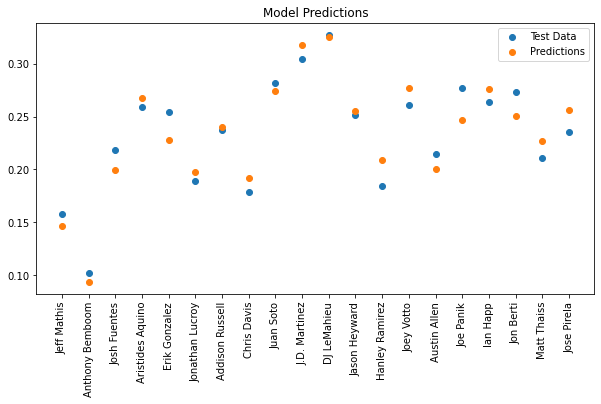

In [566]:
#LinearRegression
lr_model = test_model(LinearRegression(), X_test, X_train, y_test, y_train)

---------- Model Stats ----------


Model Score: 0.88602342475218
MAE: 0.018126660287081344
MSE: 0.0006704361206794263


--------------------------------------------------------------------------------




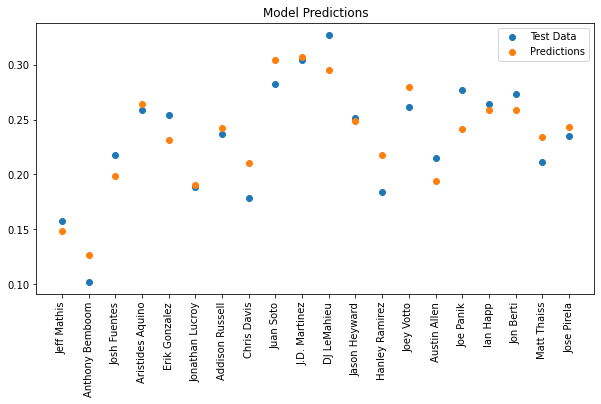

In [567]:
rf_model = test_model(RandomForestRegressor(), X_test, X_train, y_test, y_train)

---------- Model Stats ----------


Model Score: 0.22849705268982567
MAE: 0.04607133325831306
MSE: 0.0045381556864884836


--------------------------------------------------------------------------------




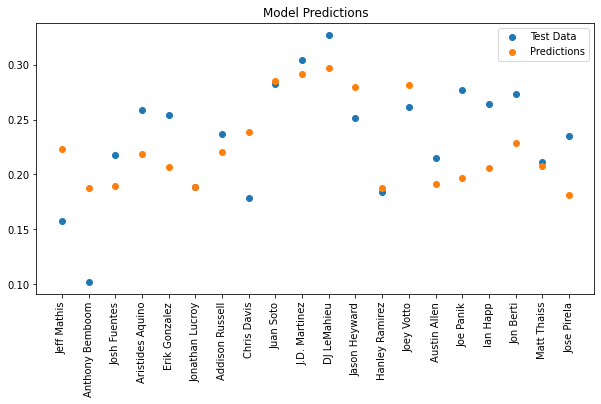

In [568]:
#Lasso Model
lasso_model = test_model(Lasso(alpha=0.3), X_test, X_train, y_test, y_train)

---------- Model Stats ----------


Model Score: 0.8969578355272576
MAE: 0.01665439860273472
MSE: 0.0006061174312818986


--------------------------------------------------------------------------------




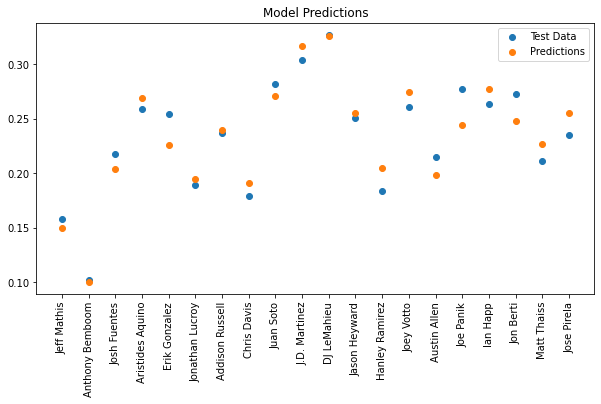

In [569]:
#Ridge Model
ridge_model = test_model(Ridge(alpha=0.7), X_test, X_train, y_test, y_train)

---------- Model Stats ----------


Model Score: 0.23953503365125198
MAE: 0.045426999064776874
MSE: 0.00447322777371499


--------------------------------------------------------------------------------




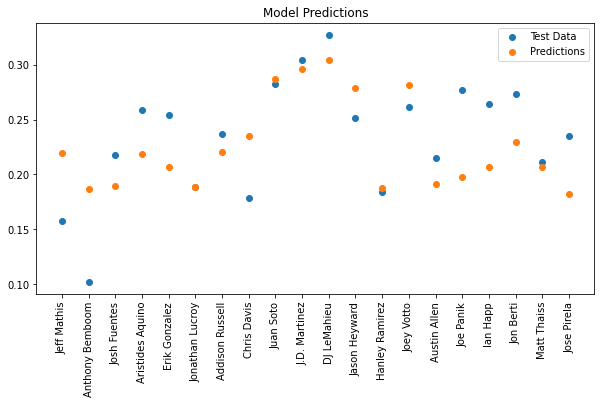

In [570]:
#ElasticNet Model
elastic_model = test_model(ElasticNet(alpha=0.5), X_test, X_train, y_test, y_train)

In [571]:
# Bring in 2020 Data
df_2020 = pd.read_csv('2020-batting-players.csv', index_col='Player')

In [572]:
#Split out data into X and y
X_2020 = df_2020[selected_features]
y_2020 = df_2020['AVG']

In [573]:
# Make predictions
y_preds = lr_model.predict(X_2020)

In [574]:
# Score the Model
lr_model.score(X_2020, y_2020)

0.8539862140335345

In [575]:
def score_new_dataset(model, X, y):
  # Make predictions
  f_preds = model.predict(X)

  # Score the Model
  f_score = model.score(X, y)

  #Print out findings
  print("Model Metrics")
  print("-" * 50)
  print('\n')
  print(f"Model Score: {f_score}")
  print(f"MAE: {mean_absolute_error(y, f_preds)}")
  print(f"MSE: {mean_squared_error(y, y_preds)}")

  # Graph Predictions
  print('\n')
  print('-' * 80)
  print('\n')
  plt.figure(figsize=(10,5))
  plt.title("First 10 Model Predictions")
  plt.scatter(y.index[:10], y.values[:10])
  plt.scatter(y.index[:10], f_preds[:10])
  plt.xticks(rotation=45)
  plt.legend(['Test Data', 'Predictions'])

  #Return predictions
  return f_preds



Model Metrics
--------------------------------------------------


Model Score: 0.8539862140335345
MAE: 0.031293749610938726
MSE: 0.002058141926845486


--------------------------------------------------------------------------------




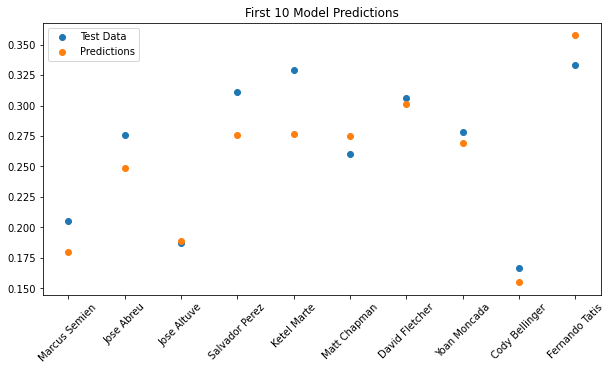

In [576]:
#LinearRegression Scoring on 2020 Data
lr_preds = score_new_dataset(lr_model, X_2020, y_2020)

Model Metrics
--------------------------------------------------


Model Score: 0.6815371034183038
MAE: 0.03295393684210528
MSE: 0.002058141926845486


--------------------------------------------------------------------------------




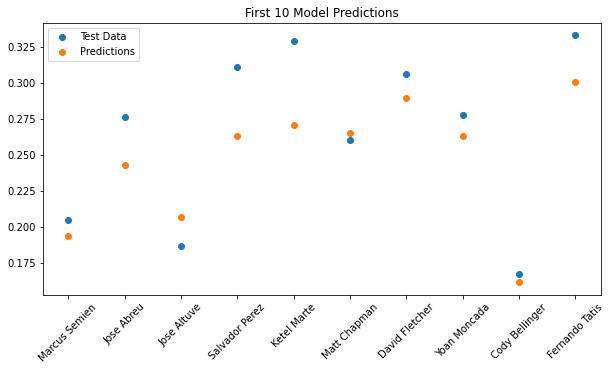

In [577]:
#RandomForest Scoring on 2020 Data
rf_preds = score_new_dataset(rf_model, X_2020, y_2020)

Model Metrics
--------------------------------------------------


Model Score: 0.8389989733357193
MAE: 0.03241360770029196
MSE: 0.002058141926845486


--------------------------------------------------------------------------------




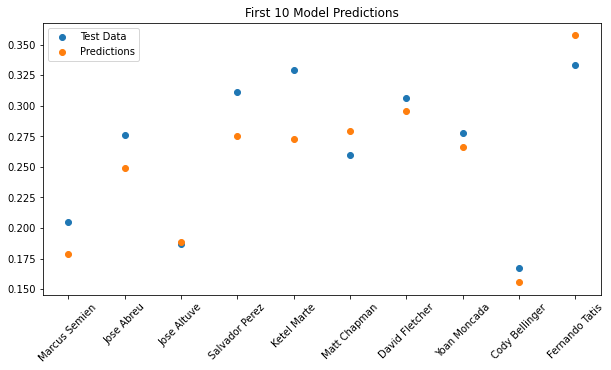

In [578]:
#RidgeRegression Scoring on 2020 Data
ridge_preds = score_new_dataset(ridge_model, X_2020, y_2020)

Model Metrics
--------------------------------------------------


Model Score: -0.07193352104571238
MAE: 0.08596874916942532
MSE: 0.002058141926845486


--------------------------------------------------------------------------------




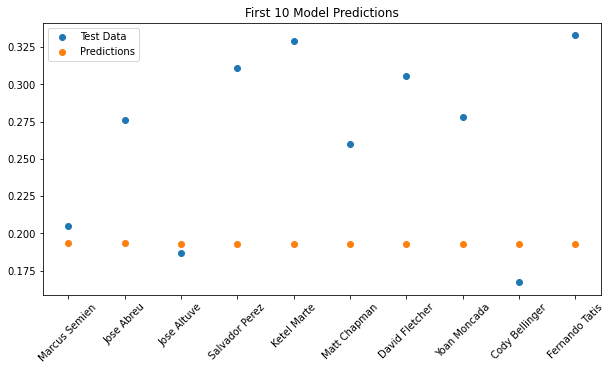

In [579]:
#LassoRegression Scoring on 2020 Data
lasso_preds = score_new_dataset(lasso_model, X_2020, y_2020)

Model Metrics
--------------------------------------------------


Model Score: -0.06561829732143454
MAE: 0.08561408471946406
MSE: 0.002058141926845486


--------------------------------------------------------------------------------




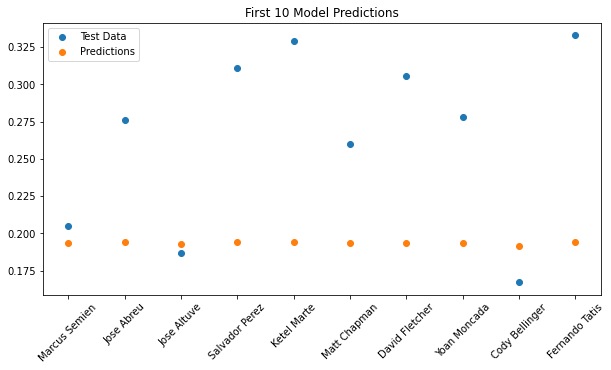

In [580]:
#ElasticNetRegression Scoring on 2020 Data
elastic_preds = score_new_dataset(elastic_model, X_2020, y_2020)

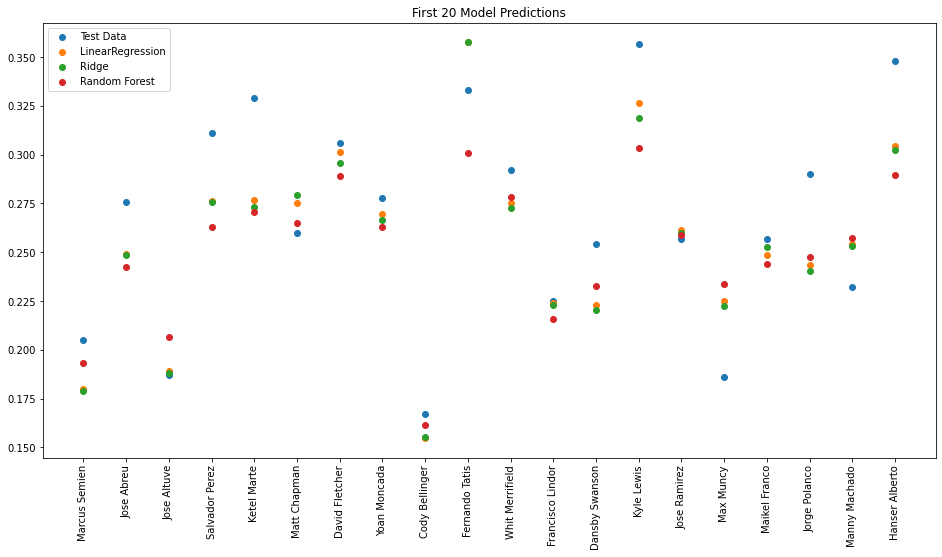

In [581]:
# Comparing All Models Top 20 Predictions
plt.figure(figsize=(16,8))
plt.title("First 20 Model Predictions")
plt.scatter(y_2020.index[:20], y_2020.values[:20])
plt.scatter(y_2020.index[:20], lr_preds[:20])
plt.scatter(y_2020.index[:20], ridge_preds[:20])
plt.scatter(y_2020.index[:20], rf_preds[:20])
plt.xticks(rotation=90)
plt.legend(['Test Data', 'LinearRegression', 'Ridge', 'Random Forest'], loc='upper left')

In [582]:
# LinearRegression Predictions
lr_predictions_df = pd.DataFrame({'Test Data': y_2020, 'LR Predictions':lr_preds})

In [583]:
# Lets see the lr_predictions_df 
lr_predictions_df.head()

,Test Data,LR Predictions
Player,,
Marcus Semien,0.205,0.179887
Jose Abreu,0.276,0.248987
Jose Altuve,0.187,0.189258
Salvador Perez,0.311,0.276089
Ketel Marte,0.329,0.276947


In [584]:
# RidgeRegression Predictions
ridge_predictions_df = pd.DataFrame({'Test Data': y_2020, 'Ridge Predictions':ridge_preds})

In [585]:
# Lets see the ridge_regression_df
ridge_predictions_df.head()

,Test Data,Ridge Predictions
Player,,
Marcus Semien,0.205,0.178775
Jose Abreu,0.276,0.248762
Jose Altuve,0.187,0.188251
Salvador Perez,0.311,0.275533
Ketel Marte,0.329,0.273164
